## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones. Guarda el modelo final en un archivo con pickle.

In [1]:
# librerías de python
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer


In [2]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [3]:
# datos del dataset de cáncer

In [4]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
# descripción del dataset

In [11]:
df = pd.DataFrame( data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
# el df con su X, y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# describe del df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [17]:
# value counts normalizado del target, ¿está balanceado?
df['target'].value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

<Axes: >

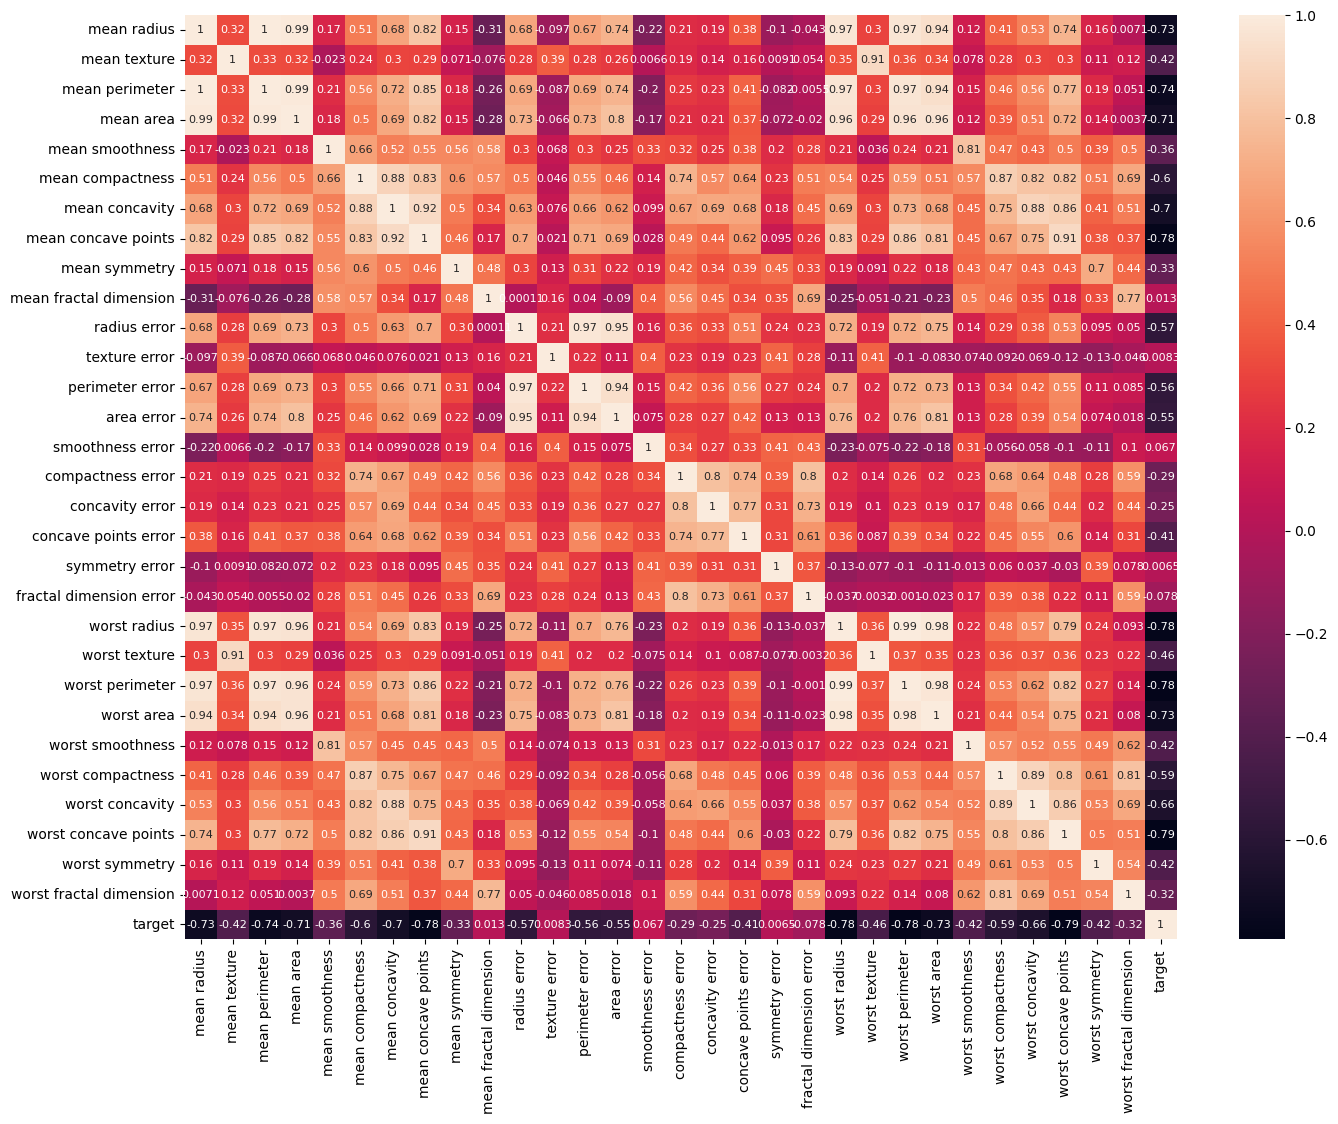

In [25]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={'size':8})


<Axes: >

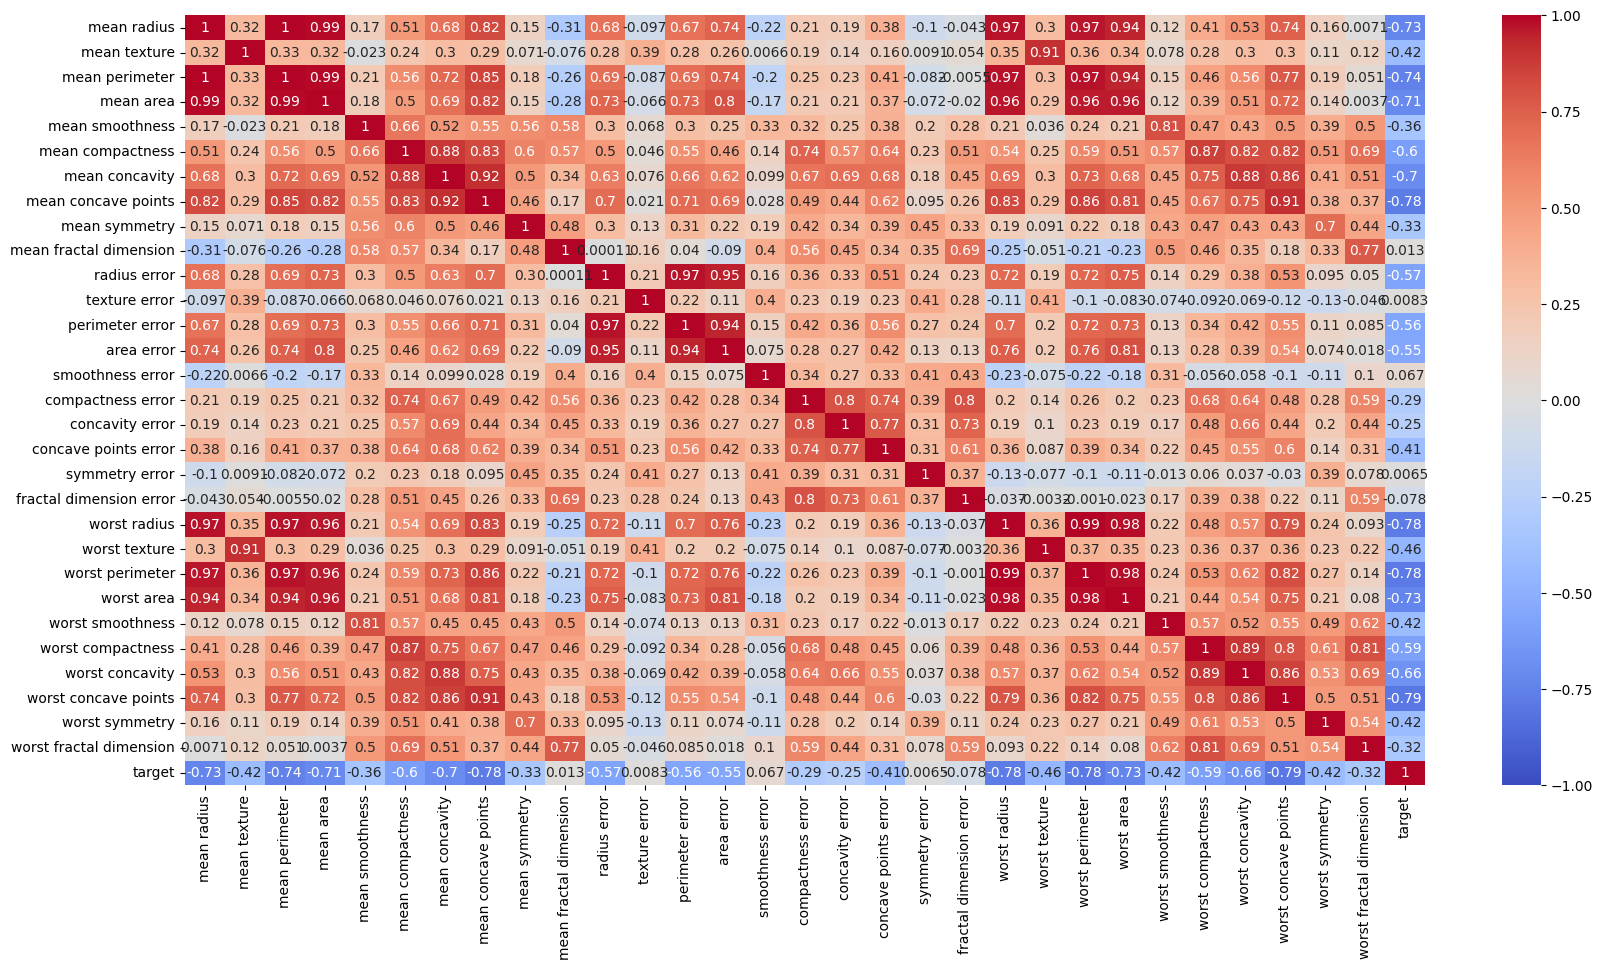

In [ ]:

# heatmap del mapa de correlación

<Axes: xlabel='mean perimeter', ylabel='mean area'>

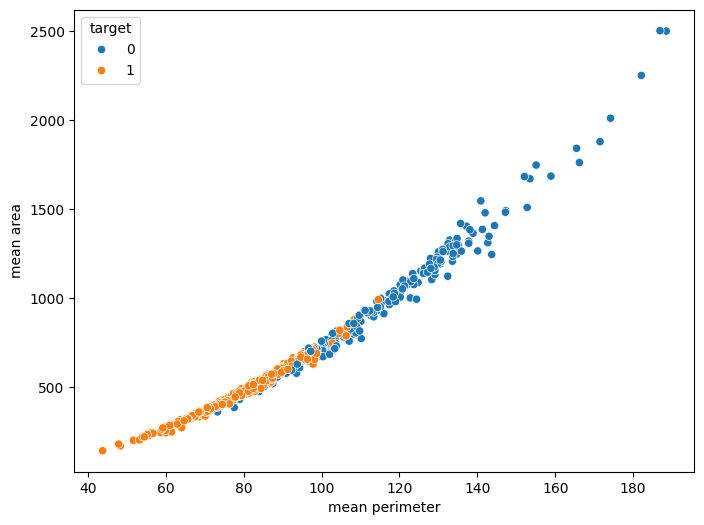

In [33]:
plot_df = df[['mean perimeter', 'mean area', 'target']]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=plot_df,
    x='mean perimeter',
    y='mean area',
    hue= 'target'
)


<Axes: xlabel='mean perimeter', ylabel='mean area'>

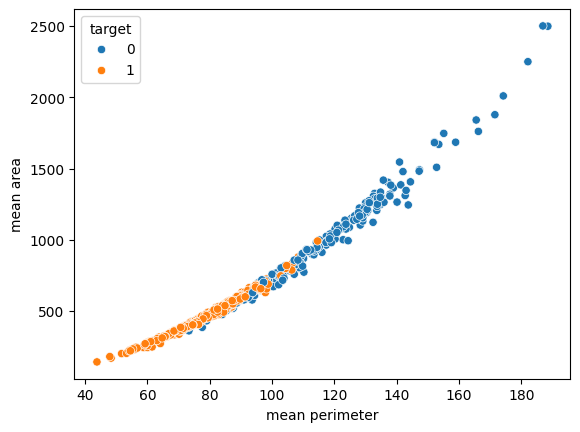

In [ ]:

# scatter de 'mean perimeter' y 'mean area', hue es el target

([<matplotlib.patches.Wedge at 0x1e4973e4c10>,
 [Text(-0.4286547583668386, 1.0130424957174637, 'benign'),
  Text(0.4286549676938969, -1.0130424071436221, 'malign')])

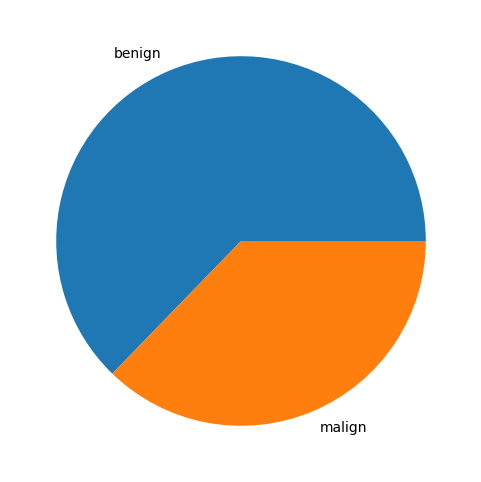

In [35]:
values = df['target'].value_counts()
sizes = values.values
labels = ['benign', 'malign']

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    startangle=0
)

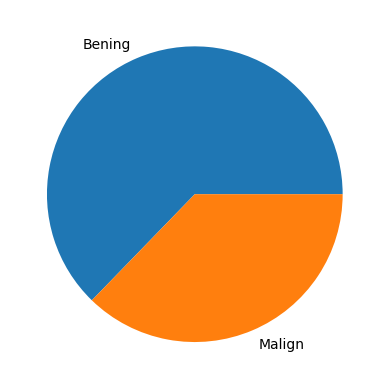

In [ ]:

# diagrama de tarta para la distribución del target


## Modelado

In [36]:
# importa train test split
from sklearn.model_selection import train_test_split

In [40]:
# define X, y, haz train test split
X = pd.DataFrame(cancer.data, columns= cancer.feature_names)
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [46]:
# importa pipeline
from sklearn.pipeline import Pipeline
# importa standardscaler, minmaxscaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importaselectkbest
from sklearn.feature_selection import SelectKBest, f_classif
# modelos Logistic regression
from sklearn.linear_model import LogisticRegression
# modelos randomforestclassifier, gradientboostingclassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# knn classifier, svc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# gridsearchcv, randomizedcv

# métricas accuracy, confusion matrix, precision, recall, roc_auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

In [45]:
#definimos el nuevo pipeline de 3 pasos 
# 1. scaler : estandariza los vectores
# 2. selector: selecciona las mejores caracteristicas 
# 3. classifier: Entrena el modelo final

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)),
    ('clasifier', RandomForestClassifier(random_state=42))
])
pipe

,steps,"[('scaler', ...), ('selector', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,score_func,<function f_c...001E4979BF250>
,k,10
,n_estimators,100
,criterion,'gini'


In [ ]:


# pipeline con steps standardscaler, selectkbest, y luego un randomforestclassifier

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('classifier', RandomForestClassifier())])

In [53]:
# parámetros logística selectkbest con k de 5  a 12, 3 valores
# C 0.01, 10, 1000
log_params = {
    'scaler': [StandardScaler()], # Asumimos StandardScaler ya que no se especificó
    'classifier': [LogisticRegression(solver='liblinear', max_iter=1000)],
    'feature_selection__k': np.linspace(5, 12, 3, dtype=int), # k de 5 a 12, 3 valores
    'classifier__C': [0.01, 10, 1000]
}

# randomforest con standardscaler, minmaxscaler, None
# k best de 5 a 12, 3 valores
# max_depth de 2 a 7 2 valores
rf_params = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k': np.linspace(5, 12, 3, dtype=int), # k best de 5 a 12, 3 valores
    'classifier': [RandomForestClassifier(random_state=42)],
    'classifier__max_depth': np.linspace(2, 7, 2, dtype=int) # max_depth de 2 a 7 2 valores
}
# gradientboosting
gb_params = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k': np.linspace(5, 12, 3, dtype=int), # k de 5 a 12, 3 valores
    'classifier': [GradientBoostingClassifier(random_state=42)],
    'classifier__max_depth': np.linspace(2, 7, 2, dtype=int) # max_depth de 2 a 7, 2 valores
}
# standardscaler, minmaxscaler, none
# k de 5 a 12, 3 valores
# max_depth de 2 a 7, 2 valores

# knn con k de 5 a 12, 3 valores
# vecinos de 5 a 15, 3 valores
knn_params = {
    'scaler': [StandardScaler(), MinMaxScaler()], # Asumimos escalado para KNN
    'feature_selection__k': np.linspace(5, 12, 3, dtype=int), # k de 5 a 12, 3 valores
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': np.linspace(5, 15, 3, dtype=int) # vecinos de 5 a 15, 3 valores
}
# svm con k entre 5 y 12, 3 valores
# hiperparámetro C 0.01, 10, 1000
# kernel polinómico y gaussiano
svm_params = {
    'scaler': [StandardScaler(), MinMaxScaler()], # Asumimos escalado para SVM
    'feature_selection__k': np.linspace(5, 12, 3, dtype=int), # k entre 5 y 12, 3 valores
    'classifier': [SVC(probability=True, random_state=42)],
    'classifier__C': [0.01, 10, 1000],
    'classifier__kernel': ['poly', 'rbf'] # kernel polinómico y gaussiano
}


In [49]:
# posibilidades en el search
search = [log_params, rf_params, gb_params, knn_params, svm_params]

In [54]:
# gridsearchcv con 3 folds
grid_search = GridSearchCV(estimator=pipe, 
                         param_grid=search, 
                         cv=3, 
                         scoring='accuracy', 
                         verbose=2, 
                         n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_search

Fitting 3 folds for each of 99 candidates, totalling 297 fits


ValueError: Invalid parameter 'classifier' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest()),
                ('clasifier', RandomForestClassifier(random_state=42))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [ ]:
# best_score, best_estimator, best_params

print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

0.9582461949575927
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(8))),
                ('classifier', LogisticRegression(C=10))])
{'classifier': LogisticRegression(), 'classifier__C': 10, 'feature_selection__k': np.int64(8)}


In [ ]:


print('accuracy_score', accuracy_score(y_test, y_pred))
print('precision_score', precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('confusion_matrix\n', confusion_matrix(y_test, y_pred))

accuracy_score 0.9824561403508771
precision_score 0.9859154929577465
recall_score 0.9859154929577465
roc_auc_score 0.9813298395021289
confusion_matrix
 [[42  1]
 [ 1 70]]


In [21]:
import pickle

In [22]:
pickle.dump(final_model, open('final_model.pkl', 'wb'))

In [23]:
modelo_importado = pickle.load(open("final_model.pkl", 'rb'))
modelo_importado

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(8))),
                ('classifier', LogisticRegression(C=10))])

In [24]:
modelo_importado.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [25]:
modelo_importado['classifier'].coef_

array([[ 2.04080814,  2.77618168, -0.8218105 , -1.80642004, -3.23640355,
        -0.70763269, -5.03568857, -1.54774297]])

In [26]:
modelo_importado['feature_selection'].get_feature_names_out()

array(['x0', 'x2', 'x3', 'x7', 'x20', 'x22', 'x23', 'x27'], dtype=object)

In [27]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [28]:
np.logspace(-2,4,100)

array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05480231e-02, 8.11130831e-02,
       9.32603347e-02, 1.07226722e-01, 1.23284674e-01, 1.41747416e-01,
       1.62975083e-01, 1.87381742e-01, 2.15443469e-01, 2.47707636e-01,
       2.84803587e-01, 3.27454916e-01, 3.76493581e-01, 4.32876128e-01,
       4.97702356e-01, 5.72236766e-01, 6.57933225e-01, 7.56463328e-01,
       8.69749003e-01, 1.00000000e+00, 1.14975700e+00, 1.32194115e+00,
       1.51991108e+00, 1.74752840e+00, 2.00923300e+00, 2.31012970e+00,
       2.65608778e+00, 3.05385551e+00, 3.51119173e+00, 4.03701726e+00,
       4.64158883e+00, 5.33669923e+00, 6.13590727e+00, 7.05480231e+00,
       8.11130831e+00, 9.32603347e+00, 1.07226722e+01, 1.23284674e+01,
       1.41747416e+01, 1.62975083e+01, 1.87381742e+01, 2.15443469e+01,
      

In [29]:
log_params = {
    'feature_selection__k': np.arange(5,12),
    'classifier': [LogisticRegression()],
    'classifier__C': np.logspace(-2,4,100)
}

rf_params = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k': np.arange(5,12),
    # 'classifier': [LogisticRegression()],
    'classifier__max_depth': np.arange(2,7),
    'classifier__min_samples_leaf': np.arange(5,20)
}

gb_params = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k': np.arange(5,12),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': np.arange(2,7),
    'classifier__learning_rate': np.logspace(-2,4,100)
}

knn_params = {
    # 'scaler': [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k': np.arange(5,12),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': np.arange(5,15)
}

svm_params = {
    # 'scaler': [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k': np.arange(5,12),
    'classifier': [SVC()],
    'classifier__C': np.logspace(-2,4,100),
    'classifier__kernel': ['poly', 'rbf']
}

search = [log_params,
         rf_params,
         gb_params,
         knn_params,
         svm_params]

In [ ]:
# randomizedSearchCV

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('feature_selection',
                                              SelectKBest()),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'classifier': [LogisticRegression()],
                                         'classifier__C': array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2....
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04]),
                                         'classifier__kernel': ['poly', 'rbf'],
                                         'feature_selection__k': array([ 5,  6,  7,  8,  9, 10, 11])}],
                   scoring='accuracy', verbose=2)

In [31]:
print(clf_rs.best_score_)
print(clf_rs.best_estimator_)
print(clf_rs.best_params_)

0.9582316718949692
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(10))),
                ('classifier',
                 LogisticRegression(C=np.float64(6.135907273413176)))])
{'feature_selection__k': np.int64(10), 'classifier__C': np.float64(6.135907273413176), 'classifier': LogisticRegression()}


In [32]:
final_model = clf_rs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print('accuracy_score', accuracy_score(y_test, y_pred))
print('precision_score', precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('confusion_matrix\n', confusion_matrix(y_test, y_pred))

accuracy_score 0.9824561403508771
precision_score 0.9859154929577465
recall_score 0.9859154929577465
roc_auc_score 0.9813298395021289
confusion_matrix
 [[42  1]
 [ 1 70]]
